## Homework 1

## <em>Intro to Statistics</em>
<br>
This notebook is arranged in cells. Texts are usually written in the markdown cells, and here you can use html tags (make it bold, italic, colored, etc). You can double click on this cell to see the formatting.<br>
<br>
The ellipsis (...) are provided where you are expected to write your solution but feel free to change the template (not over much) in case this style is not to your taste. <br>
<br>
<em>Hit "Shift-Enter" on a code cell to evaluate it.  Double click a Markdown cell to edit. </em><br><br>
<span style="color:blue"> Problems are directly taken from MacKay Chapter 3 (http://www.inference.org.uk/itprnn/book.pdf). We recommend you to read Chapter 3 before starting HW1.  </span> <br>

***

### Imports

In [2]:
import numpy as np
from scipy.integrate import quad, fixed_quad
#For plotting
import matplotlib.pyplot as plt
%matplotlib inline

***

#### Quick tutorial: Numerical Integration (using scipy's quad function)

##### Example - Harmonic Oscillator

The total energy of a harmonic oscillator is given by <br>
$$ E = \frac{1}{2}m \left(\frac{dx}{dt}\right)^2 + V(x) $$
Assuming that the potential $V(x)$ is symmetric about $x=0$ and the amplitude of the oscillator is $a$. Then the equation for the time period is given by <br>
$$ T = \sqrt{8m} \int_0^a \frac{dx}{\sqrt{V(a) - V(x)}} $$

<span style="color:blue"> Q1. Suppose the potential is $V(x) = x^4$ and mass of the particle $m=1$. Then the below cell shows a function that calculates the period for a given amplitude. </span>



In [ ]:
def V(x):
    'Potential'
    return x**4

def timep(x, a):
    'Define the function that needs to be integrated (integrand) to calculate time period'
    return np.sqrt(8)*(V(a) - V(x))**-0.5

<span style="color:blue"> Q2. Let $a = 2$. Use inbuilt 'fixed_quad' (https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.integrate.fixed_quad.html) function to calculate the time period for different values of 'N' (number of integration points). Calculate the error in the integral by estimating the difference for 'N' & '2N'. Approximately, at what 'N' is the absolute error less than $10^{-4}$ for 'a = 2'? </span>

<span style="color:blue"> Q3. Use inbuilt 'quad' (https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html) function that returns an error estimate and compare your answer for 'a = 2' (quad uses a more advanced integration technique) </span>

In [ ]:
# Using fixed_quad
a = 2

#N = 100
n = 100
tquadn = fixed_quad(timep, 0, a, args = (a, ), n = n)[0]
tquadn2 = fixed_quad(timep, 0, a, args = (a, ), n = 2*n)[0]
print('\nFor n = %d, the time period is %0.3f, with error = %0.3e'%(n, tquadn, abs(tquadn2 - tquadn)))
#N = 1000
n = 1000
tquadn = fixed_quad(timep, 0, a, args = (a, ), n = n)[0]
tquadn2 = fixed_quad(timep, 0, a, args = (a, ), n = 2*n)[0]
print('\nFor n = %d, the time period is %0.3f, with error = %0.3e'%(n, tquadn, abs(tquadn2 - tquadn)))
#N = 10000
n = 10000
tquadn = fixed_quad(timep, 0, a, args = (a, ), n = n)[0]
tquadn2 = fixed_quad(timep, 0, a, args = (a, ), n = 2*n)[0]
print('\nFor n = %d, the time period is %0.3f, with error = %0.3e'%(n, tquadn, abs(tquadn2 - tquadn)))

# Using quad
tquad = quad(timep, 0, a, args = (a, ))
print('\nInbuilt Gaussian Quadrature gives time period = ', tquad[0], ' with error = ', tquad[1])


For n = 100, the time period is 1.848, with error = 3.055e-03

For n = 1000, the time period is 1.853, with error = 3.076e-04

For n = 10000, the time period is 1.854, with error = 3.078e-05

Inbuilt Gaussian Quadrature gives time period =  1.8540746773017016  with error =  2.006794730391448e-10


***

#### Problem 1 - Inferring a Decay Constant

Unstable particles are emitted from a source and decay at a distance $x$, a real number that has an exponential probability distribution with characteristic length $\lambda$. Decay events can be observed only if they occur in a window extending from $x$ = 1cm to $x$ = 20cm. $N$ decays are observed at locations {$x_1$, ... , $x_N$}. What is $\lambda$? <br>
![alt text](https://drive.google.com/uc?id=1zlovMrjhFqW9Vz5dFoElWZpBFMWUp-Dq)

Given $\lambda$, the probability of observing a particle at a distance $x$ is:<br>

\begin{equation}
P(x\ |\ \lambda) =  
\begin{cases}
\frac{1}{\lambda}e^{-x/\lambda}\big/\ Z(\lambda)\ \ \ \ \ \ a < x < b \\
0 \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \mathrm{otherwise}
\end{cases}
\end{equation}

where
$$ Z(\lambda) = \int_a^b dx \frac{1}{\lambda}e^{-x/\lambda} = \big( e^{-a/\lambda} - e^{-b/\lambda} \big). $$
Here, $a = 1,\ b = 20$.
<br> <br>
<span style="color:blue"> 1. Write a function for $Z(\lambda)$. Then, use it to write another function for $P(x|\lambda)$. </span> <br>
<br>
Henceforth, we refer to $\lambda$ as $L$ (for the sake of simplicity).<br>
<br>
Check if your function can return a correct value if either $x$ or $L$ is a 2D array. Say $x$ is a scalar, and $L$ is a vector with $N$ elements. If you calculate the product $x*L$, the dimension of $x$ is stretched to $N \times 1$ in order to match that of $L$ ([broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html)). If $x$ and $L$ are both vectors, then they must have the same dimensions to perform arithmetic operations on them ($x*L$, $x$+$L$, $x$/$L$, etc).

In [3]:
def Z(L, a=1, b=20):
  return np.exp(-a/L) - np.exp(-b/L)

def P(x, L, a=1, b=20):
  p1 = np.where(x<a, 0, 1/L * np.exp(-x/L) / Z(L, a, b))
  return np.where(x>b, 0, p1)

<span style="color:blue"> <i> 2. Plot $P(x|\lambda)$ as a function of $x$ for $\lambda = 2, 5, 10$. Make sure to label each plot. </i></span>

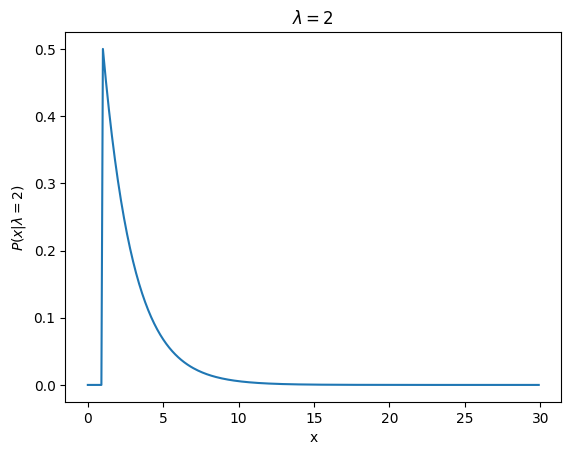

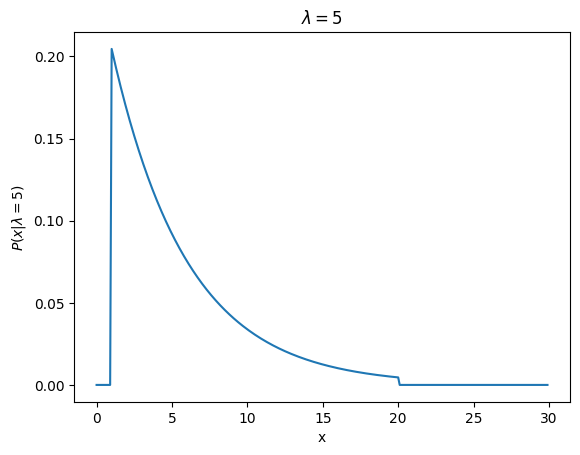

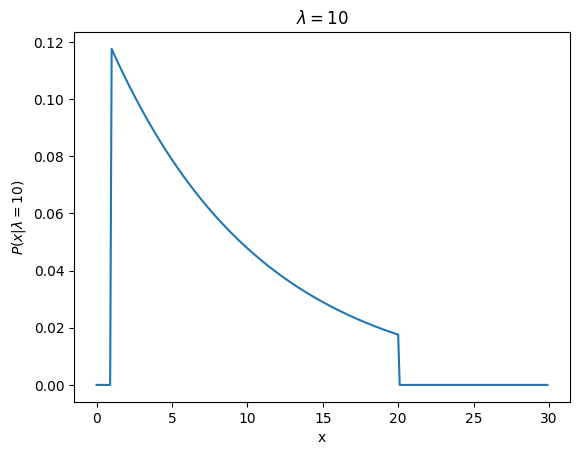

In [4]:
# Create arrays for x and L.

# Plot the probability desity as a function of x for each lambda.
# Hint: You can use a for-loop an"d" make a plot for each element of an array L. (But you don't
#have to do it in this way.)
# Hint2: You should label each plot. To do this in a for-loop, you should remember that you can
#insert values into a string with the placeholder % (https://docs.python.org/2.4/lib/typesseq-strings.html).

# x = np.arange(1,20,0.01)
x = np.arange(0,30,0.1)
L = np.array([2,5,10])

for ii, l in enumerate(L):
  plt.plot(x, P(x,l))
  plt.xlabel('x')
  plt.ylabel('$P(x|\lambda=%d)$' %l)
  plt.title(r'$\lambda=%d$' %l)
  plt.show()

<span style="color:blue"> <i> 3. Plot $P(x|\lambda)$ as a function of $\lambda$ for $x = 3, 5, 12$. (This function is known as the <b>likelihood</b> of $\lambda$) Make sure to label each plot. Note that a peak emerges in each plot. </i></span>

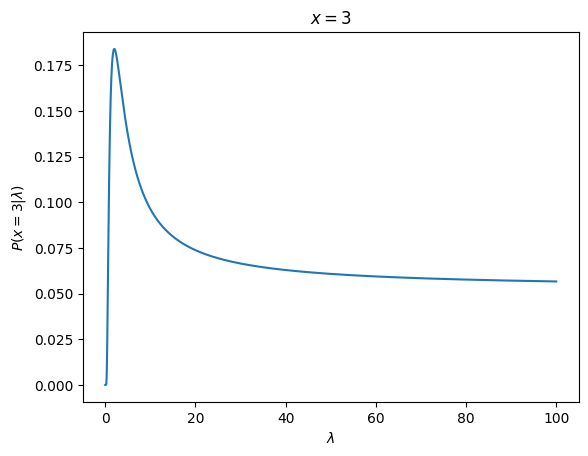

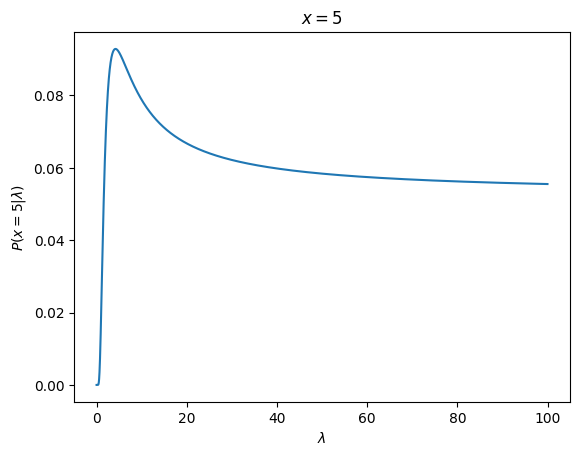

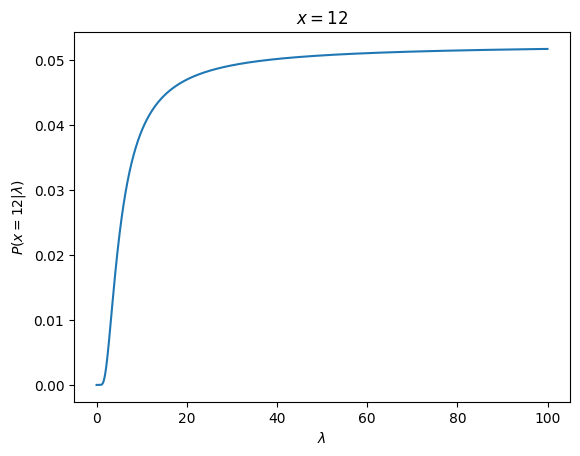

In [5]:
# Create arrays for x and L.
x = np.array([3,5,12])
L = np.arange(0,100,0.01)[1:]

# Plot the probability desity as a function of L for each x. Label each plot.
for ii, x in enumerate(x):
  plt.plot(L, P(x,L))
  plt.xlabel('$\lambda$')
  plt.ylabel('$P(x=%d|\lambda)$' %x)
  plt.title(r'$x=%d$' %x)
  plt.show()

<span style="color:blue"> <i> 4. Plot $P(x|\lambda)$ as a function of $x$ and $\lambda$. Create a surface plot.  </i></span>

In [6]:
# Import packages for making a 3D plot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.ticker as mticker

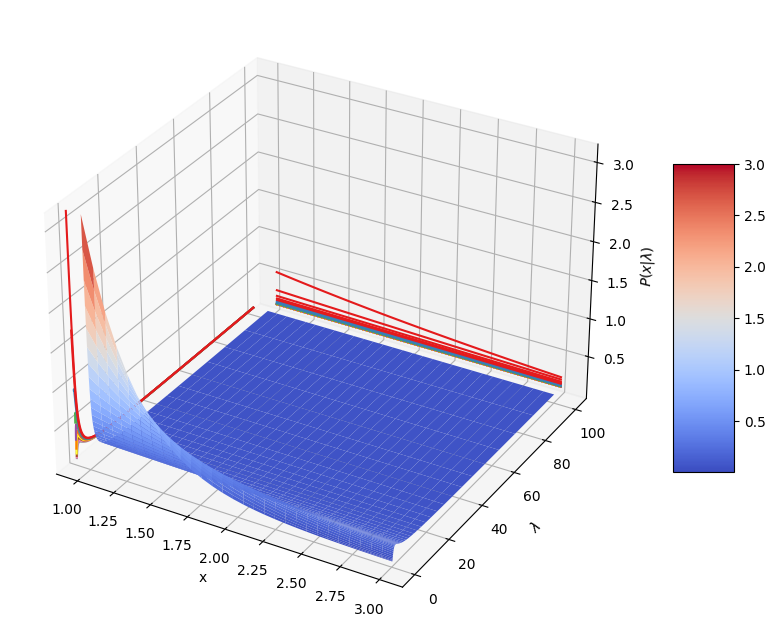

In [11]:
# Hint/suggestion:
# Create arrays for x and L. These define your "x" and "y" coordinates.
x = np.linspace(1,3,30)
L = np.logspace(-0.5,2,40)

# Create coordinate matrices from coordinate vectors.
x, L = np.meshgrid(x, L)

# Evaluate probability densities at all (x,y) coordinates. This is your "z" coordinate.
z = P(x, L)

# Make plot
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(x, L, z, vmax=3, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=True)

# Add contour plots
cset = ax.contour(x, L, z, 10, zdir='x', offset=0.9, cmap=cm.Set1)
cset = ax.contour(x, L, z, 60, zdir='y', offset=105, cmap=cm.Set1)

ax.set_xlabel('x')
ax.set_ylabel('$\lambda$')
ax.set_zlabel('$P(x|\lambda)$')

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


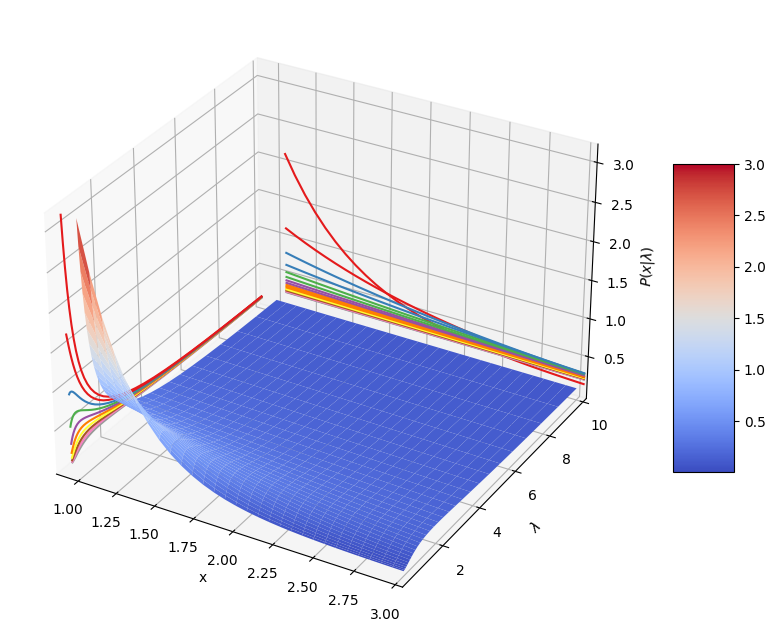

In [ ]:
x = np.linspace(1,3,30)
L = np.logspace(-0.5,1,30)
x, L = np.meshgrid(x, L)

z = P(x, L)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(x, L, z, vmax=3, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=True)

cset = ax.contour(x, L, z, 10, zdir='x', offset=0.9, cmap=cm.Set1)
cset = ax.contour(x, L, z, 20, zdir='y', offset=10.5, cmap=cm.Set1)

ax.set_xlim(0.9,3)
ax.set_ylim(1.0e-1,1.0e1)

ax.set_xlabel('x')
ax.set_ylabel('$\lambda$')
ax.set_zlabel('$P(x|\lambda)$')

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In the above figure, two contour plots (constant $x$ and $y$ slices) are also included. Compare them to the figures you created in part 2 and 3. They are the same; they correspond to vertical sections through surface.<br>

Now write Bayes' theorem:<br>

\begin{align}
P(\lambda\ |\ \{x_1, ..., x_N\}) & = \frac{P(\{x\}|\lambda)P(\lambda)}{P(\{x\})} \\
& \propto \frac{1}{(\lambda Z(\lambda))^N}\ \mathrm{exp} \big( -\sum_1^N x_n/\lambda \big) P(\lambda)
\end{align}
<br>
<span style="color:blue"> <i> 5. Define the likelihood function $P(\{x\}|\lambda)$ and plot $P(\{x \} = \{1.5, 2, 3, 4, 5, 12\}|\lambda)$ as a function of $\lambda$. Assuming a constant prior $P(\lambda)$, estimate the peak posterior value of $\lambda$ and the error on $\lambda$ by fitting to a gaussian at the peak.  </i></span>

In [12]:
def Pl(x, L, p=1):
  '''Likelihood function P({x}|L)'''
  N = len(x)
  return 1/(L**N) * 1/(Z(L)**N) * np.exp(-np.sum(x)/L) * p

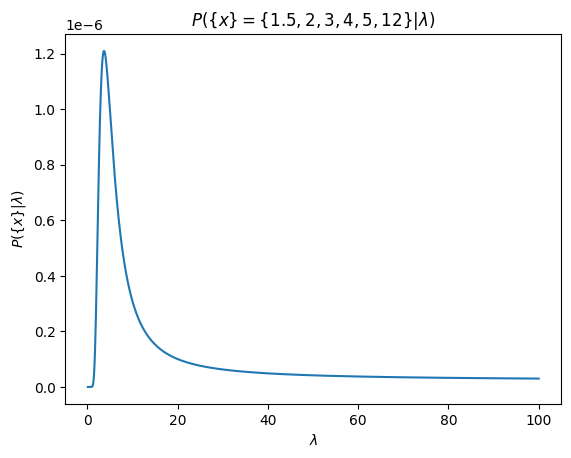

In [13]:
# Create an array for L. Assume that it is evenly spaced numbers over the interval (1e-1, 1e2).
# Create an array for x.
L = np.arange(1e-1, 1e2+1e-1, 1e-1)
x = [1.5, 2, 3, 4, 5, 12]
# Evaluate the likelihood function and plot it as a function of L
# Make plot
plt.plot(L, Pl(x,L))
plt.xlabel('$\lambda$')
plt.ylabel('$P(\{x\}|\lambda)$')
plt.title('$P(\{x\}=\{1.5, 2, 3, 4, 5, 12\}|\lambda)$')
plt.show()

In [14]:
# How is the posterior related to the likelihood and the prior?

# Estimate the peak posterior value of L (Hint - https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html)
L = np.arange(1e-1, 1e2+1e-1, 1e-1)
x = [1.5, 2, 3, 4, 5, 12]
pp_idx = np.argmax(Pl(x,L))
print('Peak Posterior L:', L[pp_idx])

Peak Posterior L: 3.7


Peak Posterior L = 3.722 +- 1.577
Error = 1.577


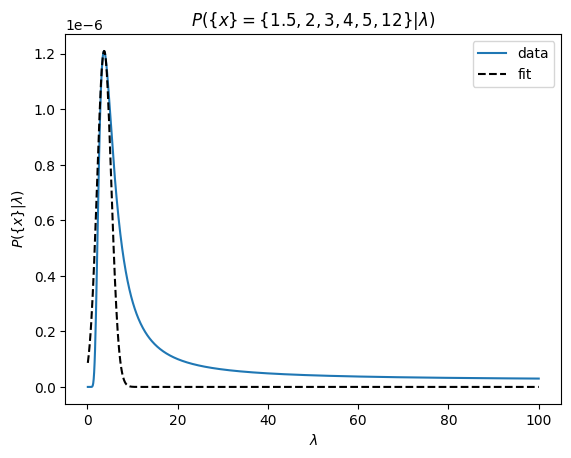

In [15]:
# Estimate the error on L  by fitting to a gaussian at the peak
# Import packages for curve fitting
from scipy import optimize
# Create an array of L near L_max
nearest = 5
L_peak = L[pp_idx-nearest:pp_idx+nearest]
Pl_peak = Pl(x,L)[pp_idx-nearest:pp_idx+nearest]
# Define Gaussian function with arbitrary amplitude (See https://en.wikipedia.org/wiki/Normal_distribution)
def gaussian(x, mu, sigma, amp=1):
  return amp/(sigma*np.sqrt(2*np.pi))*np.exp(-0.5*((x-mu)/sigma)**2)
# Fit a Gaussian function to a data
#(https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)
# You can use different packages if you wish. This is only a suggestion.
popt, pcov = optimize.curve_fit(gaussian, L_peak, Pl_peak, p0=[np.max(Pl_peak), 1, 1e-5])
# Plot both data and fit
plt.plot(L, Pl(x,L), label='data')
# plt.plot(L_peak,gaussian(L_peak,popt[0],popt[1],popt[2]), color='k')
plt.plot(L,gaussian(L,popt[0],popt[1],popt[2]), color='k', linestyle='dashed', label='fit')
plt.legend(loc='best')
plt.xlabel('$\lambda$')
plt.ylabel('$P(\{x\}|\lambda)$')
plt.title('$P(\{x\}=\{1.5, 2, 3, 4, 5, 12\}|\lambda)$')
print('Peak Posterior L = %0.3f +- %0.3f'%(popt[0], popt[1]))
print('Error = %0.3f'%popt[1])
plt.show()

<span style="color:blue"> <i> 6. Let's say that it was previously believed that the characteristic length $\lambda$ were $3.5\pm2.0$. Modelling this prior $P(\lambda)$ belief with a Gaussian distribution, write a new function that returns the posterior function for this dataset (up to $\lambda$-independent normalization). Allow this function to take general mean and standard deviation of the prior in order to do the last part of this problem. Use this function to estimate the new peak posterior value of $\lambda$. </i></span>

In [16]:
# Write a new posterior function for this dataset (up to lambda-independent normalization)
# This should take the mean and standard deviation of the prior as input.
def Pl2(x, L, ppl=3.5, sigma=2.):
  '''Likelihood function P({x}|L) for Gaussian prior P(L) with mean ppl and uncertainty sigma'''
  N = len(x)
  return 1/(L**N) * 1/(Z(L)**N) * np.exp(-np.sum(x)/L) * gaussian(L, ppl, sigma)
# Using the given prior belief, determine the maximum:
print('Peak Posterior L:', L[np.argmax(Pl2(x,L))])

Peak Posterior L: 3.6


<span style="color:blue"> <i> 7. Determine the limiting behavior of this new peak posterior value as the uncertainty on the prior belief goes to zero and as it goes to infinity by evaluating this peak posterior value for uncertainties of 1e-3 and 1e3. </i></span>

In [17]:
# Determine maximum posterior value of lambda for uncertainty of 1e-3
print('Peak Posterior L (uncertainty of 1e-3):', L[np.argmax(Pl2(x,L,3.5,1e-3))])

# Determine maximum posterior value of lambda for uncertainty of 1e3
print('Peak Posterior L (uncertainty of 1e3):', L[np.argmax(Pl2(x,L,3.5,1e3))])

Peak Posterior L (uncertainty of 1e-3): 3.5000000000000004
Peak Posterior L (uncertainty of 1e3): 3.7


<span style="color:blue"> <i> 8. Why should we expect these values?
   </i></span>

<span style="color:blue"> <i> Answer: </i></span><br>
If the uncertainty on the prior belief approaches zero (i.e. is very small), the prior belief is very precise, and therefore the peak posterior value should be very close to the prior, asymptotically approaching it as the uncertainty goes to zero. In this limit, the prior term $P(\lambda)$ dominates over the likelihood term $P(\{x\}|\lambda)$ (i.e. $P(\lambda|\{x\}) \simeq P(\lambda)$), and the peak posterior value should then approach the mean of the prior, which is 3.5.

If the uncertainty on the prior belief approaches infinity, the prior belief is not at all precise, and the prior function approaches a constant value (as in part 5). In this limit, $P(\lambda|\{x\}) \simeq P(\{x\}|\lambda)$. This results in a peak posterior value that approaches the value given by the mean of the likelihood $P(\{x\}|\lambda)$, which is 3.7.

* Uninformative prior returns likelihood (mean and STD same as likelihood)

***

#### Problem 2 - Biased Coin

When spun on edge 256 times, a Belgian one-euro coin came up heads 142 times and tails 114. Do these data give evidence that the coin is biased rather than fair? <br>
<br>
We compare the models $\mathcal{H}_0$ - the coin is fair - and $\mathcal{H}_1$ - the coin is biased. <br>
<br>
First, suppose that the model $\mathcal{H}_1$ assumes a uniform prior distribution for $p$ (the probability of getting heads in a single toss): $P(p|\mathcal{H}_1) = 1$. <br>
<br>
Let the data $D$ be a sequence which contains counts of the two possible outcomes (H - head / T - tail): e.g. HHTHT, HHHTTHTT, etc. <br>
<br>
Given a particular $p$, the probability that $F$ tosses results in a sequence $D$ of $F_H$ heads and $F_T$ tails is:
$$ P(D|p,\mathcal{H}_1) = p^{F_H} (1-p)^{F_T}. $$
<br>
Then,
$$ P(D|\mathcal{H}_1) = \int_0^1 dp\ p^{F_H} (1-p)^{F_T} = \frac{\Gamma(F_H+1)\Gamma(F_T+1)}{\Gamma(F_H+F_T+2)} .$$
Note that the above integral is a "Beta function" $B(F_H+1, F_T+1)$ and can be written in terms of the gamma function. (See http://www.math.uah.edu/stat/special/Beta.html) <br>
<br>
The gamma function is an extension of the factorial function $\Gamma(n+1) = n!$ <br> <br>
$$ \frac{\Gamma(F_H+1)\Gamma(F_T+1)}{\Gamma(F_H+F_T+2)} = \frac{F_H! F_T!}{(F_H+F_T+1)!} $$
<br>
Similarly,
$$ P(D|\mathcal{H}_0) = \big(\frac{1}{2}\big)^F. $$
<br>
<span style="color:blue"> <i> 1. Find the likelihood ratio $\frac{P(D|\mathcal{H}_1)}{P(D|\mathcal{H}_0)}$, assuming the uniform prior of $\mathcal{H}_1$. Which model does the data favor?</i></span> <br>
<br>
(Hint: If the argument of the gamma function is large, math.gamma() overflows. You can prevent this by using the fact:
$$ log(xy/z) = log(x)+log(y)-log(z) $$ <br>
Then, you can evaluate $P = \Gamma(x)*\Gamma(y)/\Gamma(z)$ in the following way:
$$ Q = log(P) = log(\Gamma(x))+log(\Gamma(y))-log(\Gamma(z)) $$
$$ P = e^Q $$
<br>
You can easily evaluate logarithm of the gamma function using "lgamma" (from math import lgamma) see https://docs.python.org/2/library/math.html)<br>
<br>
(Hint2: For reference, you can read: https://en.wikipedia.org/wiki/Bayes_factor)

In [18]:
from math import lgamma, log
F = 256
F_H = 142
F_T = 114
lpdh1 = lgamma(F_H+1) + lgamma(F_T+1) - lgamma(F+2)
pdh1 = np.exp(lpdh1)
print('Likelihood ratio:', pdh1 * 2 ** F)

Likelihood ratio: 0.3600892135186811


<span style="color:blue"> <i> Answer: </i></span><br> The data favor model $\mathcal{H}_0$ since the likelihood ratio is less than 1. (When the likelihood ratio is greater than 1, the data favor the model in the numerator; when the likelihood ratio is less than 1, the data favor the model in the denominator.)

Instead of assuming a uniform prior, suppose that we add a small bias, and consequently the prior were presciently set: <br>
$$ P(p|\mathcal{H}_1, \alpha) = \frac{1}{Z(\alpha)}p^{\alpha-1}(1-p)^{\alpha-1},\ \  \mathrm{where}\ \ Z(\alpha) = \Gamma(\alpha)^2/\Gamma(2\alpha) $$
<br>
<span style="color:blue"> <i> 2. Calculate the likelihood ratio $\frac{P(D|\mathcal{H}_1)}{P(D|\mathcal{H}_0)}$, assuming the above prior of $\mathcal{H}_1$. Let $\alpha$ = \{ .37, 1.0, 2.7, 7.4, 20, 55, 148, 403, 1096 \}. </i></span><br>


<span style="color:blue"> <i> Answer: write down the analytic expression of $\frac{P(D|\mathcal{H}_1)}{P(D|\mathcal{H}_0)}$. Show your work here. </i></span>

<!-- $$P(D|\mathcal{H}_1) = \int_0^1 dp\ P(D|p,\mathcal{H}_1) P(p|\mathcal{H}_1,\alpha) = \frac{\Gamma(F_H+1)\Gamma(F_T+1)}{\Gamma(F_H+F_T+2)}\cdot\frac{1}{Z(\alpha)} \int_0^1 dp\
p^{\alpha-1} (1-p)^{\alpha-1} = \frac{\Gamma(F_H+1)\Gamma(F_T+1)\Gamma(2\alpha)}{\Gamma(F_H+F_T+2)\Gamma(\alpha)^2} \int_0^1 dp\
p^{\alpha-1} (1-p)^{\alpha-1}$$ -->

<!-- $$\frac{P(D|\mathcal{H}_1)}{P(D|\mathcal{H}_0)} = 2^{F}\cdot\frac{\Gamma(F_H+1)\Gamma(F_T+1)\Gamma(2\alpha)}{\Gamma(F_H+F_T+2)\Gamma(\alpha)^2} \int_0^1 dp\
p^{\alpha-1} (1-p)^{\alpha-1}=2^{F}\cdot\frac{\Gamma(F_H+1)\Gamma(F_T+1)\Gamma(2\alpha)}{\Gamma(F_H+F_T+2)\Gamma(\alpha)^2} \cdot \frac{\Gamma(\alpha)^2}{\Gamma(2\alpha)} = 2^F\cdot\frac{\Gamma(F_H+1)\Gamma(F_T+1)}{\Gamma(F_H+F_T+2)}$$ -->

<!-- $P(D|\mathcal{H}_1) = \int_0^1 dp\ P(D|p,\mathcal{H}_1) P(p|\mathcal{H}_1,\alpha) \\
\phantom{P(D|\mathcal{H}_1)} = \frac{\Gamma(F_H+1)\Gamma(F_T+1)}{\Gamma(F_H+F_T+2)}\cdot\frac{1}{Z(\alpha)} \int_0^1 dp\
p^{\alpha-1} (1-p)^{\alpha-1} \\
\phantom{P(D|\mathcal{H}_1)} = \frac{\Gamma(F_H+1)\Gamma(F_T+1)\Gamma(2\alpha)}{\Gamma(F_H+F_T+2)\Gamma(\alpha)^2} \int_0^1 dp\
p^{\alpha-1} (1-p)^{\alpha-1}\\
\phantom{P(D|\mathcal{H}_1)} = \frac{\Gamma(F_H+1)\Gamma(F_T+1)\Gamma(2\alpha)}{\Gamma(F_H+F_T+2)\Gamma(\alpha)^2} \cdot \frac{\Gamma(\alpha)^2}{\Gamma(2\alpha)} \\
\phantom{P(D|\mathcal{H}_1)} = \frac{\Gamma(F_H+1)\Gamma(F_T+1)}{\Gamma(F_H+F_T+2)}$

$\frac{P(D|\mathcal{H}_1)}{P(D|\mathcal{H}_0)} = 2^F\cdot\frac{\Gamma(F_H+1)\Gamma(F_T+1)}{\Gamma(F_H+F_T+2)}$

----------- -->
$P(D|\mathcal{H}_1) = \int_0^1 dp\ P(D|p,\mathcal{H}_1) P(p|\mathcal{H}_1,\alpha) \\
\phantom{P(D|\mathcal{H}_1)} = \frac{1}{Z(\alpha)} \int_0^1 dp\
p^{\alpha-1} (1-p)^{\alpha-1}p^{F_H} (1-p)^{F_T} \\
\phantom{P(D|\mathcal{H}_1)} = \frac{\Gamma(2\alpha)}{\Gamma(\alpha)^2} \int_0^1 dp\
p^{F_H+\alpha-1} (1-p)^{F_T+\alpha-1}\\
\phantom{P(D|\mathcal{H}_1)} = \frac{\Gamma(2\alpha)}{\Gamma(\alpha)^2} \cdot \frac{\Gamma(F_H+\alpha)\Gamma(F_T+\alpha)}{\Gamma(F_H+F_T+2\alpha)} \\
\phantom{P(D|\mathcal{H}_1)} = \frac{\Gamma(2\alpha)}{\Gamma(\alpha)^2} \cdot \frac{\Gamma(F_H+\alpha)\Gamma(F_T+\alpha)}{\Gamma(F+2\alpha)}$

$\frac{P(D|\mathcal{H}_1)}{P(D|\mathcal{H}_0)} = 2^F \cdot \frac{\Gamma(2\alpha)\Gamma(F_H+\alpha)\Gamma(F_T+\alpha)}{\Gamma(\alpha)^2\Gamma(F+2\alpha)}$

In [19]:
def bf2(alpha, F_H=142, F_T=114):
    '''Function to calculate Bayes factor for the new prior with small bias'''
    return 2**F * np.exp(lgamma(2*alpha) + lgamma(F_H+alpha) + lgamma(F_T+alpha) - 2*lgamma(alpha) - lgamma(F+2*alpha))

In [21]:
alphas = [.37, 1., 2.7, 7.4, 20, 55, 148, 403, 1096]
for alpha in alphas:
    print('Likelihood ratio (alpha=%0.2f):'%alpha, bf2(alpha))

Likelihood ratio (alpha=0.37): 0.18681218637426705
Likelihood ratio (alpha=1.00): 0.3600892135186811
Likelihood ratio (alpha=2.70): 0.6208731870946427
Likelihood ratio (alpha=7.40): 0.9863028469033246
Likelihood ratio (alpha=20.00): 1.383568573319744
Likelihood ratio (alpha=55.00): 1.6037740221365964
Likelihood ratio (alpha=148.00): 1.4914569982066477
Likelihood ratio (alpha=403.00): 1.2605120911875494
Likelihood ratio (alpha=1096.00): 1.1106653175624022


<span style="color:blue"> <i> 3. Does the likelihood ratio for $\mathcal{H}_1$ over $\mathcal{H}_0$ increases as $\alpha$ increases? </i></span><br>

<span style="color:blue"> <i> Answer: </i></span><br> The likelihood ratio initially increases as $\alpha$ increases but then decreases as $\alpha$ increases further (for $\alpha>55$ in the set). This is because the small bias initially makes this model more likely to describe the observed data (accounting for the discrepancy between the observed number of heads and the expected number of heads given a fair coin). However, as the bias gets larger, this model suggests that the discrepancy between the observed and expected number of heads should be even larger, so the likelihood ratio decreases.


<span style="color:blue"> <i> 4. Now, let $\mathcal{H}_1$ be the model in which the probability of getting heads is descrete at 142/256. What is the likelihood in this case? </i></span><br>

In [22]:
def binom(p, F_H=142, F_T=114):
    return p**F_H * (1-p)**F_T

print('Likelihood for H_0:', 1/2**F)
print('Likelihood for H_1:', binom(142/256))
print('Likelihood ratio:', binom(142/256) * 2**F)

Likelihood for H_0: 8.636168555094445e-78
Likelihood for H_1: 4.0055931427849106e-77
Likelihood ratio: 4.638159986377322


<span style="color:blue"> <i> 5. Explain the above result. </i></span><br>

<span style="color:blue"> <i> Answer: </i></span><br>
The binomial theorem still gives the probability that $F$ tosses results in a sequence $D$ of $F_H$ heads and $F_T$ tails; however, now $p=\frac{142}{256}$ is discrete and not continuous. When we calculate the likelihood ratio, model $\mathcal{H}_1$ is substantially favored because the number of heads in the data is equal to the expectation value given by model $\mathcal{H}_1$.

<span style="color:blue"> <i> 6. Now let us test the null hypothesis. Assuming the central limit theorem, we model the binomial as a gaussian centered at $\mu = F/2$ and with the width given by $\sigma^2 = F*(p_{heads})*(p_{tails})$. (in this case, $p_{heads} = p_{heads} = 1/2$) </i></span><br>

In [23]:
null = quad(gaussian, 142, np.inf, args = (F/2, np.sqrt(F*0.5*0.5), ))
# print('Z =', (F_H-F/2)/np.sqrt(F*0.5*0.5))
print('p =', null[0])

p = 0.040059156863817044


Since $p<0.05$, a frequentist hypothesis test interpretation says that the null hypothesis should be rejected. There is about a 4% probability that the data would be produced by chance alone.

***

#### Problem 3 - Monty Hall

On a game show, a contestant is told the rules as follows: <br>
<br>
There are three doors, labelled 1, 2, 3. A single prize has been hidden behind one of them. You get to select one door. Initially your chosen door will not be opened. Instead, the gameshow host will open one of the other two doors, and he will do so in such a way as not to reveal the prize. For example, if you first choose door 1, he will then open one of doors 2 and 3, and it is guaranteed that he will choose which one to open so that the prize will not be revealed.<br>
<br>
At this point, you will be given a fresh choice of door: you can either stick with your first choice, or you can switch to the other closed door. All the doors will then be opened and you will receive whatever is behind your final choice of door.<br>
<br>
Imagine that the contestant chooses door 1 first; then the gameshow host opens door 2, revealing nothing behind the door, as promised. Should the contestant (a) stick with door 1, or (b) switch to door 3, or (c) does it make no difference?

Let $\mathcal{H}_i$ denote the hypothesis that the prize is behind door $i$. We make the following assumptions: the three hypotheses $\mathcal{H}_1, \mathcal{H}_2, \mathcal{H}_3$ are equiprobable a <i>priori</i>, i.e., <br>
<br>
$$ P(\mathcal{H}_1) = P(\mathcal{H}_2) = P(\mathcal{H}_3) = \frac{1}{3} $$
<br>
The datum we receive, after choosing door 1, is one of $D$ = 3 and $D$ = 2 (meaning door 3 or 2 is opened, respectively).<br>
<span style="color:blue"> <i> 1. Find $P(D=2|\mathcal{H}_1), P(D=3|\mathcal{H}_1), P(D=2|\mathcal{H}_2), P(D=3|\mathcal{H}_2), P(D=2|\mathcal{H}_3), P(D=3|\mathcal{H}_3)$. </i></span><br>

<span style="color:blue"> <i> Answer: </i></span><br>

$P(D=2|\mathcal{H}_1) = P(D=3|\mathcal{H}_1) = \frac{1}{2}$ (If you chose the door with the prize, the host is free to choose either other door—we assume he will do so with equal probability)<br>
$P(D=3|\mathcal{H}_2) = P(D=2|\mathcal{H}_3) = 1$ (If the prize is behind one of the doors you didn't choose, he must open the door that the prize is not behind)<br>
$P(D=2|\mathcal{H}_2) = P(D=3|\mathcal{H}_3) = 0$ (The host cannot open the door that the prize is behind)

Now, using Bayes’ theorem, we evaluate the posterior probabilities of the hypotheses:<br>
$$ P(\mathcal{H}_i|D=2) = \frac{P(D=2|\mathcal{H}_i)P(\mathcal{H}_i)}{P(D=2)} $$ <br>
<br>
<span style="color:blue"> <i> 2. First, we need to calculate the normalizing constant (denominator). Find $P(D=2), P(D=3)$ </i></span><br>

<span style="color:blue"> <i> Answer: (Do not just write down numbers. Show your work.) </i></span><br>

<!-- $P(D=2)=P(D=3)=\frac{1}{3}(\frac{1}{2}+0+1)=\frac{1}{2}$<br> -->

$P(D=2) = \sum_{i=1}^{3} P(D=2|\mathcal{H}_i)P(\mathcal{H}_i)\\
\phantom{P(D=2)} = (\frac{1}{2}+0+1)(\frac{1}{3})\\
\phantom{P(D=2)} = \frac{1}{2}$<br>

$P(D=3) = \sum_{i=1}^{3} P(D=3|\mathcal{H}_i)P(\mathcal{H}_i)\\
\phantom{P(D=3)} = (\frac{1}{2}+1+0)(\frac{1}{3})\\
\phantom{P(D=2)} = \frac{1}{2}$<br>

<span style="color:blue"> <i> 3. Evaluate the posterior probability and argue if the contestant should switch to door 3. <br>
<br>Alternatively, you can perform a thought experiment in which the game is played with 100 doors. The rules are now that the contestant chooses one door, then the game show host opens 98 doors in such a way as not to reveal the prize, leaving the contestant’s selected door and one other door closed. The contestant may now stick or switch. Where do you think the prize is? </i></span><br>

<span style="color:blue"> <i> Answer: (Do not just write down numbers. Show your work.) </i></span><br>

$P(D=2|\mathcal{H}_1)P(\mathcal{H}_1)=\frac{1}{2}\cdot\frac{1}{3}=\frac{1}{6}$<br>
$P(D=2|\mathcal{H}_2)P(\mathcal{H}_2)=0\cdot\frac{1}{3}=0$<br>
$P(D=2|\mathcal{H}_3)P(\mathcal{H}_3)=1\cdot\frac{1}{3}=\frac{1}{3}$<br>
$P(\mathcal{H}_1|D=2)=\frac{\frac{1}{6}}{\frac{1}{2}}=\frac{1}{3}$<br>
$P(\mathcal{H}_2|D=2)=0$<br>
$P(\mathcal{H}_3|D=2)=\frac{\frac{1}{3}}{\frac{1}{2}}=\frac{2}{3}$<br>

The contestant should switch to door 3 because the probability of the prize being behind door 3 is now higher due to the new information obtained by the host opening door 2  (twice as high as staying with door 1).

***
Imagine that the game happens again and just as the gameshow host is about to open one of the doors a violent earthquake rattles the building and one of the three doors flies open. It happens to be door 3, and it happens not to have the prize behind it. The contestant had initially chosen door 1.<br><br>
Repositioning his toupee, the host suggests, ‘OK, since you chose door 1 initially, door 3 is a valid door for me to open, according to the rules of the game; I’ll let door 3 stay open. Let’s carry on as if nothing happened.’
Should the contestant stick with door 1, or switch to door 2, or does it make no difference? Assume that the prize was placed randomly, that the gameshow host does not know where it is, and that the door flew open because its latch was broken by the earthquake.<br><br>
[A similar alternative scenario is a gameshow whose confused host forgets the rules, and where the prize is, and opens one of the unchosen doors at random. He opens door 3, and the prize is not revealed. Should the contestant choose what’s behind door 1 or door 2? Does the optimal decision for the contestant depend on the contestant’s beliefs about whether the gameshow host is confused or not?]

***
If door 3 is opened by an earthquake, the inference comes out differently – even though visually the scene looks the same. The nature of the data, and the probability of the data, are both now different. The possible data outcomes are, firstly, that any number of the doors might have opened. We could label the eight possible outcomes <b>d</b> = (0,0,0),(0,0,1),(0,1,0),(1,0,0),(0,1,1),...,(1,1,1). <br><br>
Secondly, it might be that the prize is visible after the earthquake has opened one or more doors. So the data $D$ consists of the value of <b>d</b>, and a statement of whether the prize was revealed. It is hard to say what the probabilities of these outcomes are, since they depend on our beliefs about the reliability of the door latches and the properties of earthquakes, but it is possible to extract the desired posterior probability without naming the values of $P($<b>d</b>$|\mathcal{H}_i)$ for each <b>d</b>. <br><br>
All that matters are the relative values of the quantities $P(D|\mathcal{H}_1)$, $P(D|\mathcal{H}_2)$, $P(D|\mathcal{H}_3)$, for the value of $D$ that actually occurred. The value of $D$ that actually occurred is ‘<b>d</b> = (0, 0, 1), and no prize visible’.

<span style="color:blue"> <i> 4. How does $P(D|\mathcal{H}_1)$ compare with $P(D|\mathcal{H}_2)$? What is $P(D|\mathcal{H}_3)$? Find $P(D|\mathcal{H}_1)/P(D)$ and $P(D|\mathcal{H}_2)/P(D)$. </i></span><br>

<span style="color:blue"> <i> Answer: (Do not just write down numbers. Show your work.) </i></span><br>
$P(D|\mathcal{H}_1)=P(D|\mathcal{H}_2)=(0+0+1)=1$<br>
$P(D|\mathcal{H}_1)$ and $P(D|\mathcal{H}_2)$ are the same. Now that door 3 has been opened (by the earthquake, which has no knowledge of what was behind any of the doors), the host opening (or being prevented from opening by the rules of the game) any other door would reveal the location of the prize. The act of the earthquake opening door 3 is random. Since two doors remain closed and the host effectively chooses the door to open randomly, the prize can be behind either of the closed doors with equal probability. If the prize is behind door 1, opening door 2 would reveal that the prize is behind door 1, so the host must stick with door 3. If the prize is behind door 2, the host must stick with door 3 since he can't open the door that the prize is behind nor the door that you have selected.

$P(D|\mathcal{H}_3)=0$

$P(D)=1$ since the host must choose to leave door 3 open in order not to reveal the location of the prize.

$\frac{P(D|\mathcal{H}_1)}{P(D)}=\frac{P(D|\mathcal{H}_2)}{P(D)}=\frac{1}{1}=1$<br>


<span style="color:blue"> <i>  5. Evaluate the posterior probability and argue if the contestant should switch. </i></span><br>

<span style="color:blue"> <i> Answer: (Do not just write down numbers. Show your work.) </i></span><br>

$P(\mathcal{H}_1)=P(\mathcal{H}_2)=\frac{1}{2}$, since the door being opened by the earthquake was a random event and the prize can now be behind one of two doors.

$P(\mathcal{H}_1|D)=P(\mathcal{H}_2|D)=1\cdot \frac{1}{2}= \frac{1}{2}$

The contestant gains no advantage by switching because the probabilities of winning the prize by staying vs. switching are now the same.

***